In [101]:
from hossam import *
from pandas import DataFrame, Series, concat
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from itertools import product
from scipy.spatial import ConvexHull


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 성능 평가 지표 모듈
from sklearn.metrics import *


import sys

sys.path.append("/Users/jinwoo/Machine_Learning")

from hs_eval_utils import (
    hs_get_scores,
    hs_learning_cv,
    hs_get_score_cv,
    feature_importance,
    hs_shap_analysis,
    hs_describe,
    category_describe,
)

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    precision_recall_curve,
)

In [80]:
origin = load_data("pima_indians_diabetes")
origin.head()

이 데이터 세트는 원래 미국 국립 당뇨병·소화기·신장질환 연구소(National Institute of Diabetes and Digestive and Kidney Diseases)에서 제공한 것입니다. 이 데이터 세트의 목적은 데이터 세트에 포함된 특정 진단 측정값을 기반으로 환자의 당뇨병 여부를 진단적으로 예측하는 것입니다. 더 큰 데이터베이스에서 이러한 사례를 선택하는 데에는 몇 가지 제약 조건이 적용되었습니다. 특히, 여기에 포함된 모든 환자는 21세 이상의 피마 인디언 혈통을 가진 여성입니다. (출처: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

field                     type    description
------------------------  ------  --------------------------------
Pregnancies               연속형  임신횟수
Glucose                   연속형  포도당 부하 검사 수치
BloodPressure             연속형  혈압
SkinThickness             연속형  팔 삼두근 뒤쪽의 피하지방 측정값
Insulin                   연속형  혈청 인슐린
BMI                       연속형  체질량 지수
DiabetesPedigreeFunction  연속형  당뇨 내력 가중치 값
Age                       연속형  나이
Outcome                   명목형  당뇨여부(0 또는 1)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [81]:
df1 = origin.astype({"Outcome": "category"})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [82]:
hs_describe(df1)

,count,na_count,na_rate,mean,std,min,25%,50%,75%,max,iqr,up,down,outlier_count,outlier_rate,skew,dist,log_need
Pregnancies,768.000,0,0.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000,5.000,13.500,-6.500,4,0.521,0.902,약간 우측 꼬리,중간
Glucose,768.000,0,0.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000,41.250,202.125,37.125,5,0.651,0.174,거의 대칭,낮음
BloodPressure,768.000,0,0.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000,18.000,107.000,35.000,45,5.859,-1.844,중간 좌측 꼬리,높음
SkinThickness,768.000,0,0.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000,32.000,80.000,-48.000,1,0.130,0.109,거의 대칭,낮음
Insulin,768.000,0,0.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000,127.250,318.125,-190.875,34,4.427,2.272,극단 우측 꼬리,높음
BMI,768.000,0,0.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100,9.300,50.550,13.350,19,2.474,-0.429,거의 대칭,낮음
DiabetesPedigreeFunction,768.000,0,0.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420,0.382,1.200,-0.330,29,3.776,1.920,중간 우측 꼬리,높음
Age,768.000,0,0.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000,17.000,66.500,-1.500,9,1.172,1.130,중간 우측 꼬리,높음


In [83]:
a, b = category_describe(df1)
display(a)
display(b)

,변수,범주,빈도,비율(%)
0,Outcome,0,500,65.100
1,Outcome,1,268,34.900


,최다_범주,최다_비율(%),최소_범주,최소_비율(%)
변수,,,,
Outcome,0,65.100,1,34.900


In [84]:
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df2 = df1.copy()

df2[zero_features] = df2[zero_features].replace(0, np.nan)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


In [85]:
imr = SimpleImputer(missing_values=np.nan, strategy="median")
df_imr = imr.fit_transform(df2.values)

df3 = DataFrame(df_imr, index=df2.index, columns=df2.columns)

df3 = df3.astype({"Outcome": "category"})

desc = hs_describe(df3)
desc

,count,na_count,na_rate,mean,std,min,25%,50%,75%,max,iqr,up,down,outlier_count,outlier_rate,skew,dist,log_need
Pregnancies,768.000,0,0.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000,5.000,13.500,-6.500,4,0.521,0.902,약간 우측 꼬리,중간
Glucose,768.000,0,0.000,121.656,30.438,44.000,99.750,117.000,140.250,199.000,40.500,201.000,39.000,0,0.000,0.536,약간 우측 꼬리,중간
BloodPressure,768.000,0,0.000,72.387,12.097,24.000,64.000,72.000,80.000,122.000,16.000,104.000,40.000,14,1.823,0.142,거의 대칭,낮음
SkinThickness,768.000,0,0.000,29.108,8.791,7.000,25.000,29.000,32.000,99.000,7.000,42.500,14.500,87,11.328,0.838,약간 우측 꼬리,중간
Insulin,768.000,0,0.000,140.672,86.383,14.000,121.500,125.000,127.250,846.000,5.750,135.875,112.875,346,45.052,3.380,극단 우측 꼬리,높음
BMI,768.000,0,0.000,32.455,6.875,18.200,27.500,32.300,36.600,67.100,9.100,50.250,13.850,8,1.042,0.599,약간 우측 꼬리,중간
DiabetesPedigreeFunction,768.000,0,0.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420,0.382,1.200,-0.330,29,3.776,1.920,중간 우측 꼬리,높음
Age,768.000,0,0.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000,17.000,66.500,-1.500,9,1.172,1.130,중간 우측 꼬리,높음


In [86]:
log_field = desc[desc["log_need"] != "낮음"].index.to_list()

df4 = df3.copy()

for f in log_field:
    df4[f] = np.log1p(df4[f])

hs_describe(df4)

,count,na_count,na_rate,mean,std,min,25%,50%,75%,max,iqr,up,down,outlier_count,outlier_rate,skew,dist,log_need
Pregnancies,768.000,0,0.000,1.311,0.770,0.000,0.693,1.386,1.946,2.890,1.253,3.825,-1.186,0,0.000,-0.243,거의 대칭,낮음
Glucose,768.000,0,0.000,4.779,0.248,3.807,4.613,4.771,4.951,5.298,0.338,5.457,4.106,4,0.521,-0.058,거의 대칭,낮음
BloodPressure,768.000,0,0.000,72.387,12.097,24.000,64.000,72.000,80.000,122.000,16.000,104.000,40.000,14,1.823,0.142,거의 대칭,낮음
SkinThickness,768.000,0,0.000,3.359,0.314,2.079,3.258,3.401,3.497,4.605,0.238,3.854,2.900,96,12.500,-0.859,약간 좌측 꼬리,중간
Insulin,768.000,0,0.000,4.827,0.495,2.708,4.808,4.836,4.854,6.742,0.046,4.923,4.739,346,45.052,-0.175,거의 대칭,낮음
BMI,768.000,0,0.000,3.489,0.204,2.955,3.350,3.506,3.627,4.221,0.277,4.043,2.934,3,0.391,-0.038,거의 대칭,낮음
DiabetesPedigreeFunction,768.000,0,0.000,0.365,0.199,0.075,0.218,0.317,0.486,1.230,0.268,0.888,-0.184,13,1.693,1.118,중간 우측 꼬리,높음
Age,768.000,0,0.000,3.482,0.313,3.091,3.219,3.401,3.738,4.407,0.519,4.516,2.441,0,0.000,0.615,약간 우측 꼬리,중간


In [87]:
df = df4
df["Outcome"] = df["Outcome"].astype("int")

yname = "Outcome"
x = df.drop(columns=[yname])
y = df[yname]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=52
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [88]:
%%time

pipe = Pipeline(
    [
        ("VIF_Selector", VIFSelector()),
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(random_state=52)),
    ]
)

param_grid = {
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs"],
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__max_iter": [100, 300, 500],
    "model__class_weight": [None, "balanced"],
}

gs = GridSearchCV(
    estimator=pipe, param_grid=param_grid, cv=5, scoring="roc_auc", n_jobs=-1
)

gs.fit(x_train, y_train)

estimator = gs.best_estimator_
estimator

CPU times: user 124 ms, sys: 81.3 ms, total: 205 ms
Wall time: 4.22 s


Pipeline(steps=[('VIF_Selector', VIFSelector()), ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=52))])

In [102]:
log_loss_test = -log_loss(y_test, y_pred_proba, normalize=False)
log_loss_test

-77.18386940419565

In [103]:
y_null = np.ones_like(y_test) * y_test.mean()
log_loss_null = -log_loss(y_test, y_null, normalize=False)
log_loss_null

-99.76854365841893

In [104]:
pseudo_r2 = 1 - (log_loss_test / log_loss_null)
pseudo_r2

0.22637069186403314

In [89]:
r2 = estimator.score(x_test, y_test)
r2

0.7662337662337663

In [90]:
y_pred_proba = estimator.predict_proba(x_test)
y_pred_proba[:5]

array([[0.17157015, 0.82842985],
       [0.95274504, 0.04725496],
       [0.41211228, 0.58788772],
       [0.35137747, 0.64862253],
       [0.98235443, 0.01764557]])

In [91]:
y_pred_proba_1 = estimator.predict_proba(x_test)[:, 1]
y_pred_proba_1[:5]

array([0.82842985, 0.04725496, 0.58788772, 0.64862253, 0.01764557])

In [92]:
y_pred = estimator.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [105]:
cm = confusion_matrix(y_test, y_pred)

((TN, FP), (FN, TP)) = cm
print(TN, TP, FN, FP)

cmdf = DataFrame(
    cm,
    index=["Actual 0 (TN/FP)", "Actual 1 (FN/TP)"],
    columns=["Predicted (Negative)", "Predicted (Positive)"],
)
cmdf

74 44 10 26


,Predicted (Negative),Predicted (Positive)
Actual 0 (TN/FP),74,26
Actual 1 (FN/TP),10,44


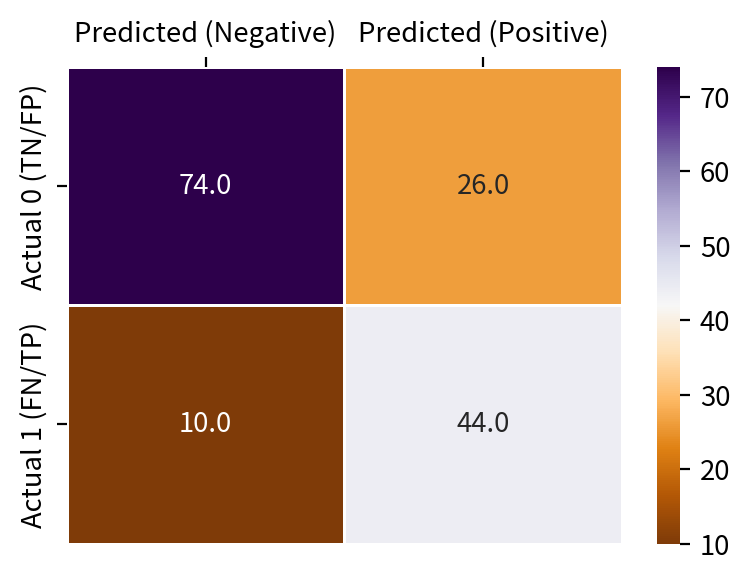

In [94]:
# 1) 그래프 초기화
width_px = 800
height_px = 600
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) heatmap 그리기
sb.heatmap(data=cmdf, annot=True, fmt="0.1f", linewidth=0.5, cmap="PuOr")

# 3) 그래프 꾸미기
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()

# 4) 출력
plt.tight_layout()
plt.show()
plt.close()

In [95]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7662337662337663

In [96]:
precision = precision_score(y_test, y_pred)
precision

0.6285714285714286

In [97]:
tpr = recall_score(y_test, y_pred)
tpr

0.8148148148148148

In [106]:
fpr = FP / (TN + FP)
fpr

0.26

In [107]:
tnr = 1 - (FP / (TN + FP))
tnr

0.74

In [98]:
f1 = f1_score(y_test, y_pred)
f1

0.7096774193548387

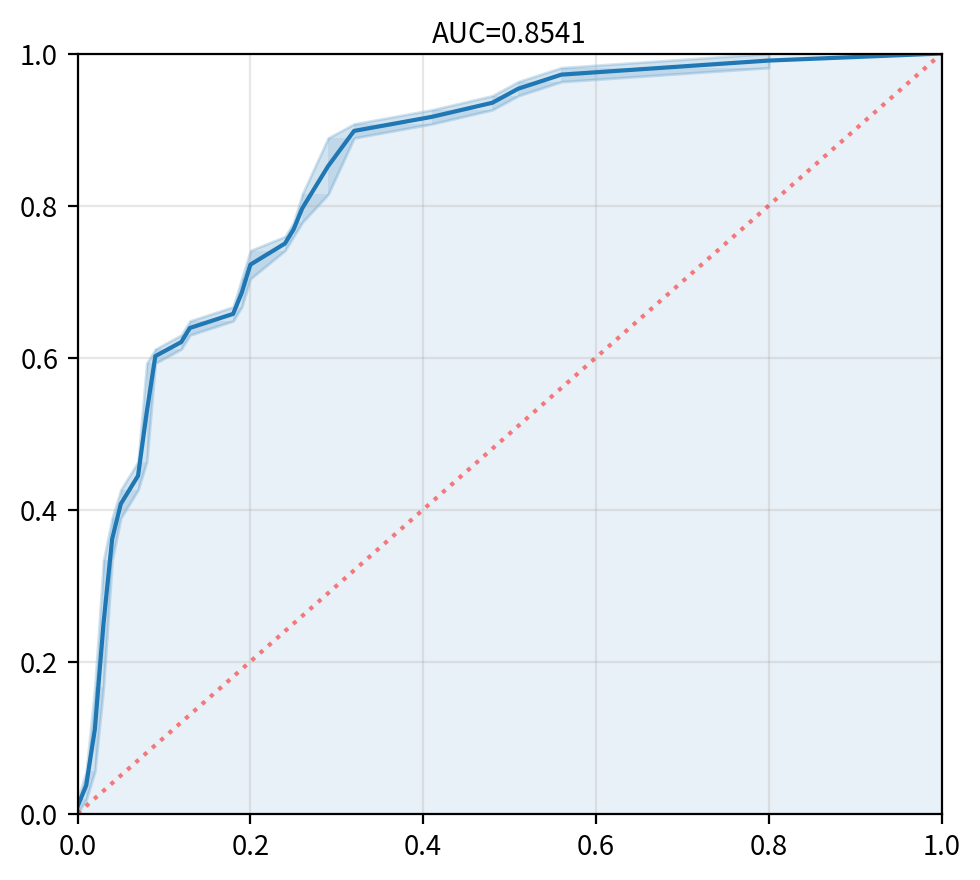

In [99]:
auc = roc_auc_score(y_test, y_pred_proba_1)

roc_fpr, roc_tpr, thresholds = roc_curve(y_test, y_pred_proba_1)

# 1) 그래프 초기화
width_px = 1000
height_px = 900
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) LinePlot 그리기
sb.lineplot(x=roc_fpr, y=roc_tpr)
sb.lineplot(x=[0, 1], y=[0, 1], color="red", linestyle=":", alpha=0.5)
plt.fill_between(x=roc_fpr, y1=roc_tpr, alpha=0.1)

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)
ax.set_title(f"AUC={auc:.4f}", fontsize=10, pad=4)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# 4) 출력
plt.tight_layout()
plt.show()
plt.close()

In [108]:
if hasattr(estimator, "named_steps"):
    classname = estimator.named_steps["model"].__class__.__name__
else:
    classname = estimator.__class__.__name__

score_df = DataFrame(
    {
        "의사결정계수(R2)": [pseudo_r2],
        "정확도(Accuracy)": [accuracy],
        "정밀도(Precision)": [precision],
        "재현율(Recall)": [tpr],
        "위양성율(Fallout)": [fpr],
        "특이성(TNR)": [tnr],
        "F1 Score": [f1],
        "AUC": [auc],
    },
    index=[classname],
)

score_df

,의사결정계수(R2),정확도(Accuracy),정밀도(Precision),재현율(Recall),위양성율(Fallout),특이성(TNR),F1 Score,AUC
LogisticRegression,0.226,0.766,0.629,0.815,0.260,0.740,0.710,<function auc at 0x313839ee0>
